# AULA 1 PIVA (ALGORITMO E ESTRUTURA DE DADOS)

### INTRODUÇÃO AO JUPYTER NOTEBOOK, E MATERIAS DA AULA

A AULA SERÁ FEITA POR METODOAULA INVERTIDA.
PODEMOS ACESSAR OS CONTEUDOS ANTES DAS AULAS ATRAVES DO SITE piva.pro.br

curso recomnedado pelo piva link https://www.pypro.com.br/

#### 1) Agora iremos fazer passo a passo o projeto Titanic

Problema: como as caracteristicas demograficas e socioeconomicas dos passageiros influenciaram suas taxas de sobrevivência no desastre do titanic?

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
#importando bibliotecas

In [10]:
# carregando datasets
url = 'train.csv'
data = pd.read_csv(url)

In [11]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
#verificando valores nulos
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Esta é a forma de vizualização dos dados ausentes que estamos fazendo até agora. Podemos também, utilizando os recursos do seaborn, mostrar um mapa de calor invertido, mostrado a ausencia de valores com uma tonalidade mais clara

<Axes: >

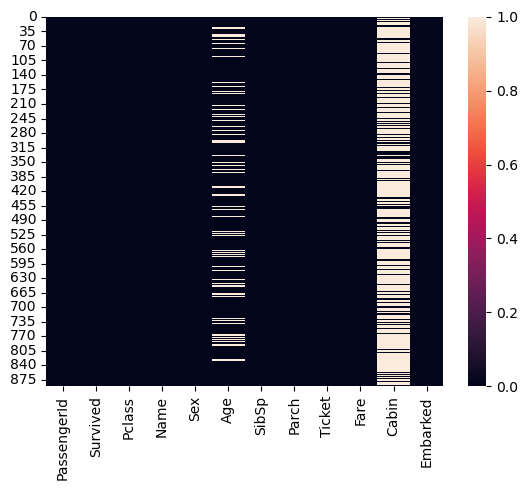

In [14]:
sns.heatmap(data.isnull())

In [15]:
#tratamento de dados faltantes
age_median = data['Age'].median()
#atribuir mediana diretamente no dataframe
data['Age'] = data['Age'].fillna(age_median)
#tratamento de dados faltantes (cabine)
data.drop(columns=['Cabin'], inplace=True)

In [16]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

<Axes: >

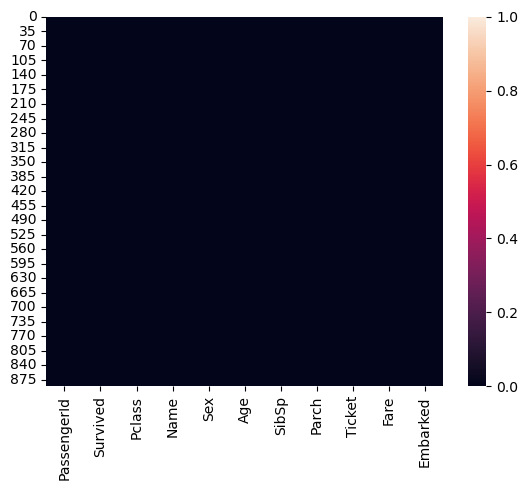

In [17]:
sns.heatmap(data.isnull())

### Etapa 2

In [19]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


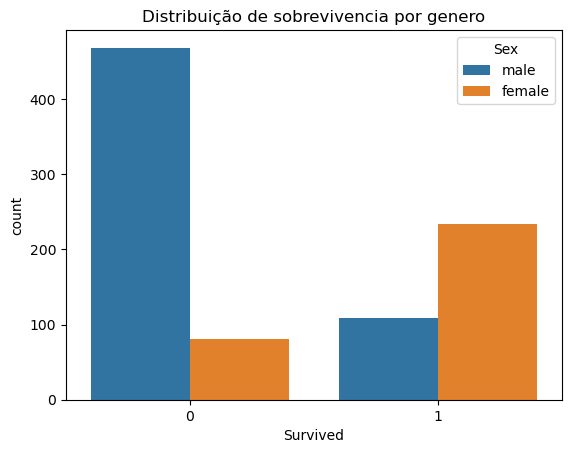

In [20]:
#distribuindo sobreviventes por genero
sns.countplot(x='Survived', hue='Sex', data=data)
plt.title('Distribuição de sobrevivencia por genero')
plt.show()

# 0 = morreu e 1 de sobrevivente

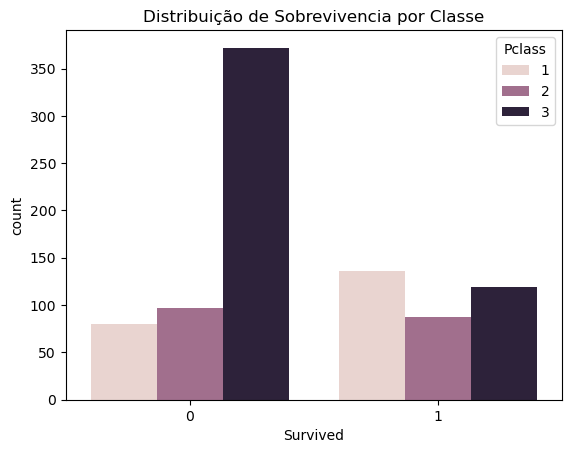

In [41]:
#distribuicao de sobreviventes por classes 
sns.countplot(x='Survived', hue='Pclass', data=data)
plt.title('Distribuição de Sobrevivencia por Classe')
plt.show()

### Etapa 3: Analise mais profunda

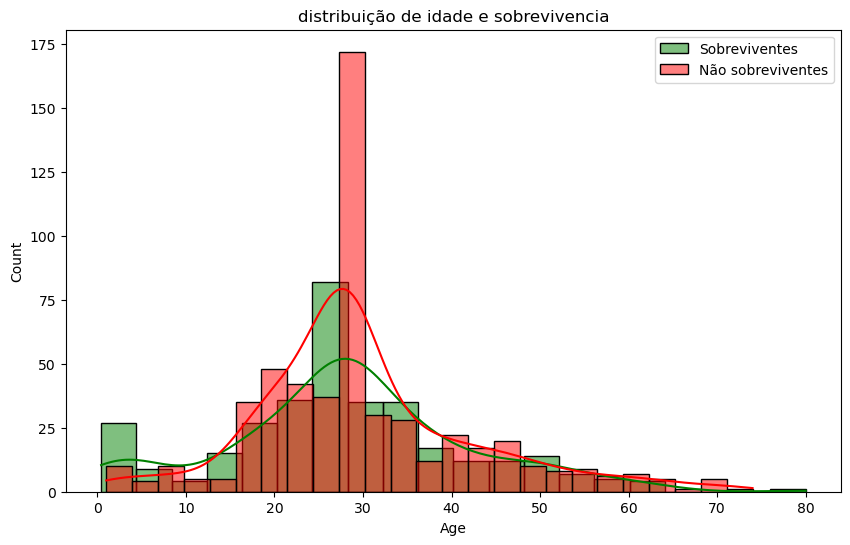

In [48]:
#Analise de idade dos passageiros e sua relação com a sobrevivencia
plt.figure(figsize=(10,6))
sns.histplot(data[data['Survived'] == 1]['Age'], color='green', kde=True, label='Sobreviventes')
sns.histplot(data[data['Survived'] == 0]['Age'], color='Red', kde=True, label='Não sobreviventes')
plt.title('distribuição de idade e sobrevivencia')
plt.legend()
plt.show()

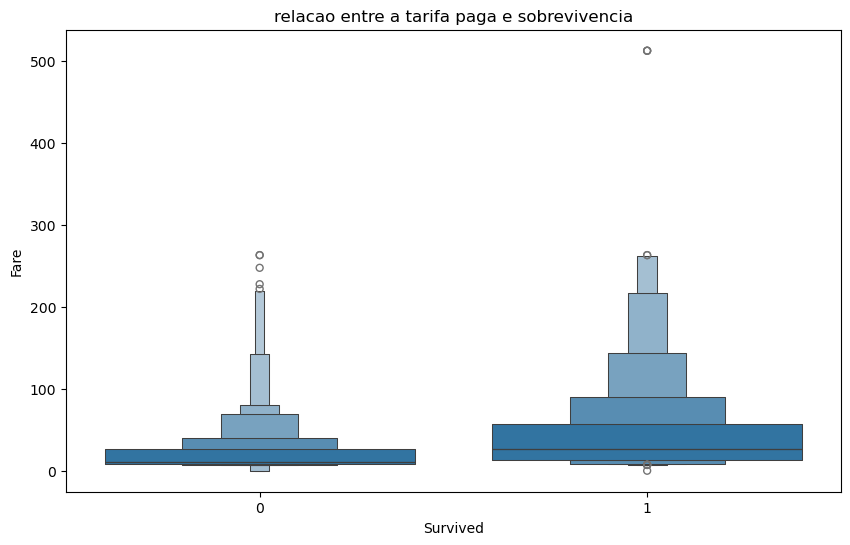

In [52]:
#Analise de tafifa paga e sobrevivencia 
plt.figure(figsize=(10, 6))
sns.boxenplot(x='Survived', y='Fare', data=data)
plt.title('relacao entre a tarifa paga e sobrevivencia')
plt.show()

### Etapa 4: Correlação e analise dos dados

In [55]:
#matriz de correlação

Discussoes e conclusoes 